## 1.Loading the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from warnings import filterwarnings
filterwarnings('ignore')

In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [57]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc,precision_score,recall_score,f1_score

## 2.Loading the Dataset

In [2]:
df_ads=pd.read_csv('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/Kaggle/social/Social_Network_Ads.csv')
df_ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df_ads.shape

(400, 5)

## 3.Explorartry Data Analysis

In [4]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df_ads.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


We can find that there are no missing values or outliers in the data.

In [6]:
#Checking correlation between the features

In [7]:
vcorr=df_ads.corr()

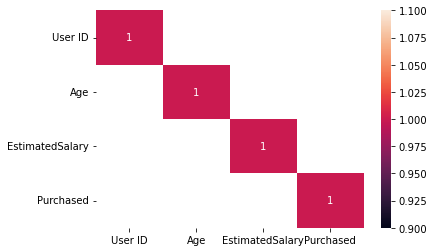

In [11]:
sns.heatmap(vcorr[(vcorr>0.80) | (vcorr<-0.80)],annot=True)
plt.show()

We can find that there is no strong correlation among the features.

In [12]:
#visualisation

In [13]:
#relationship between gender and purchase

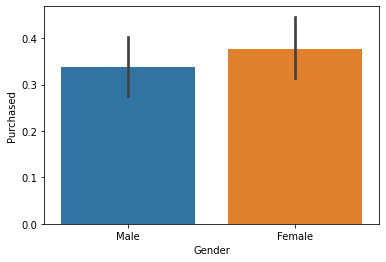

In [20]:
sns.barplot(x='Gender',y='Purchased',data=df_ads)
plt.show()

We can find that female category has more been influenced by  social network ads resulting in higher purchase.

In [21]:
#relationship between gender and purchased based on the salary

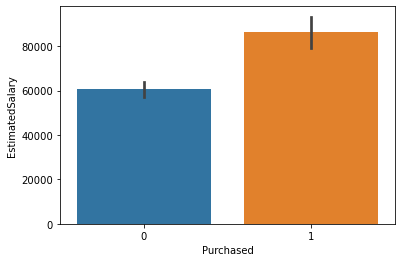

In [30]:
sns.barplot(x='Purchased',y='EstimatedSalary',data=df_ads)
plt.show()

It shows that the people who made the final purchase had comparatively more salary than the ones who didnot purchase.

In [36]:
#dropping the userid column since we don't require it for model building

In [37]:
df_ads=df_ads.drop('User ID',axis=1)

## 4.Dummy Encoding

In [38]:
#dummy_encpding the categorical variables

In [39]:
df_ads_dummy=pd.get_dummies(df_ads,drop_first=True)

In [40]:
df_ads_dummy.shape

(400, 4)

In [41]:
df_ads_dummy.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


## 5.Separating the independent and dependent variables

In [43]:
X=df_ads_dummy.drop('Purchased',axis=1)
y=df_ads_dummy['Purchased']

## 6.Separating the data into train and test set

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [48]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((320, 3), (80, 3), (320,), (80,))

## 7.Scaling the data

In [52]:
sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

## 8.Building the model

### 1.Logistic Regression

In [54]:
lr=LogisticRegression()

In [55]:
lr.fit(X_train_scaled,y_train)

LogisticRegression()

In [56]:
pred_result=lr.predict(X_test_scaled)

In [58]:
print(confusion_matrix(y_test,pred_result))

[[40  8]
 [ 6 26]]


In [59]:
print(classification_report(y_test,pred_result))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.76      0.81      0.79        32

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.83      0.82      0.83        80



In [60]:
fpr,tpr,thresholds=roc_curve(y_test,pred_result)

In [69]:
#Tabulating the results

cols=['Model','Accuracy','Precision','Recall','AUC']

result=pd.DataFrame(columns=cols)

lr_metrics=pd.Series({'Model':'LR',
                     'Accuracy':accuracy_score(y_test,pred_result),
                     'Precision':precision_score(y_test,pred_result),
                     'Recall':recall_score(y_test,pred_result),
                     'AUC':auc(fpr,tpr)})

result=result.append(lr_metrics,ignore_index=True)

result

,Model,Accuracy,Precision,Recall,AUC
0,LR,0.825,0.764706,0.8125,0.822917


### 2.Decision Tree

In [70]:
dt=DecisionTreeClassifier()

In [71]:
dt.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [73]:
pred_result=dt.predict(X_test_scaled)

In [74]:
print(confusion_matrix(y_test,pred_result))

[[40  8]
 [ 9 23]]


In [75]:
print(classification_report(y_test,pred_result))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82        48
           1       0.74      0.72      0.73        32

    accuracy                           0.79        80
   macro avg       0.78      0.78      0.78        80
weighted avg       0.79      0.79      0.79        80



In [76]:
fpr,tpr,thresholds=roc_curve(y_test,pred_result)

In [77]:
#Tabulating the results

dt_metrics=pd.Series({'Model':'DT',
                     'Accuracy':accuracy_score(y_test,pred_result),
                     'Precision':precision_score(y_test,pred_result),
                     'Recall':recall_score(y_test,pred_result),
                     'AUC':auc(fpr,tpr)})

result=result.append(dt_metrics,ignore_index=True)

result

,Model,Accuracy,Precision,Recall,AUC
0,LR,0.825,0.764706,0.8125,0.822917
1,DT,0.7875,0.741935,0.71875,0.776042


### 3.Random Forest

In [78]:
rf=RandomForestClassifier()

In [79]:
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [81]:
pred_result=rf.predict(X_test_scaled)

In [82]:
print(confusion_matrix(y_test,pred_result))

[[38 10]
 [ 3 29]]


In [83]:
print(classification_report(y_test,pred_result))

              precision    recall  f1-score   support

           0       0.93      0.79      0.85        48
           1       0.74      0.91      0.82        32

    accuracy                           0.84        80
   macro avg       0.84      0.85      0.84        80
weighted avg       0.85      0.84      0.84        80



In [84]:
fpr,tpr,thresholds=roc_curve(y_test,pred_result)

In [85]:
#Tabulating the results

rf_metrics=pd.Series({'Model':'RF',
                     'Accuracy':accuracy_score(y_test,pred_result),
                     'Precision':precision_score(y_test,pred_result),
                     'Recall':recall_score(y_test,pred_result),
                     'AUC':auc(fpr,tpr)})

result=result.append(rf_metrics,ignore_index=True)

result

,Model,Accuracy,Precision,Recall,AUC
0,LR,0.825,0.764706,0.8125,0.822917
1,DT,0.7875,0.741935,0.71875,0.776042
2,RF,0.8375,0.74359,0.90625,0.848958


### 4.KNN

In [92]:
#Getting the optimum k value

In [88]:
k_values=range(3,21)

In [89]:
acc_score={}

In [100]:
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    pred_result=knn.predict(X_test_scaled)
    acc_score[k]=accuracy_score(y_test,pred_result)

In [101]:
max(acc_score.values())

0.9

In [102]:
max(acc_score,key=acc_score.get)

20

In [103]:
#Building the model

In [104]:
knn=KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_scaled,y_train)
pred_result=knn.predict(X_test_scaled)

In [105]:
print(confusion_matrix(y_test,pred_result))

[[42  6]
 [ 2 30]]


In [106]:
print(classification_report(y_test,pred_result))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        48
           1       0.83      0.94      0.88        32

    accuracy                           0.90        80
   macro avg       0.89      0.91      0.90        80
weighted avg       0.91      0.90      0.90        80



In [107]:
fpr,tpr,thresholds=roc_curve(y_test,pred_result)

In [108]:
#Tabulating the results

knn_metrics=pd.Series({'Model':'KNN',
                     'Accuracy':accuracy_score(y_test,pred_result),
                     'Precision':precision_score(y_test,pred_result),
                     'Recall':recall_score(y_test,pred_result),
                     'AUC':auc(fpr,tpr)})

result=result.append(knn_metrics,ignore_index=True)

result

,Model,Accuracy,Precision,Recall,AUC
0,LR,0.825,0.764706,0.8125,0.822917
1,DT,0.7875,0.741935,0.71875,0.776042
2,RF,0.8375,0.74359,0.90625,0.848958
3,KNN,0.9,0.833333,0.9375,0.90625


### 5.SVC

#### A.Linear Kernel

In [110]:
svc1=SVC(kernel='linear')

svc1.fit(X_train_scaled,y_train)

pred_result=svc1.predict(X_test_scaled)

In [111]:
print(confusion_matrix(y_test,pred_result))

[[42  6]
 [ 7 25]]


In [112]:
print(classification_report(y_test,pred_result))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        48
           1       0.81      0.78      0.79        32

    accuracy                           0.84        80
   macro avg       0.83      0.83      0.83        80
weighted avg       0.84      0.84      0.84        80



In [113]:
fpr,tpr,thresholds=roc_curve(y_test,pred_result)

In [114]:
#Tabulating the results

svc_linear_metrics=pd.Series({'Model':'SVC_linear',
                     'Accuracy':accuracy_score(y_test,pred_result),
                     'Precision':precision_score(y_test,pred_result),
                     'Recall':recall_score(y_test,pred_result),
                     'AUC':auc(fpr,tpr)})

result=result.append(svc_linear_metrics,ignore_index=True)

result

,Model,Accuracy,Precision,Recall,AUC
0,LR,0.825,0.764706,0.8125,0.822917
1,DT,0.7875,0.741935,0.71875,0.776042
2,RF,0.8375,0.74359,0.90625,0.848958
3,KNN,0.9,0.833333,0.9375,0.90625
4,SVC_linear,0.8375,0.806452,0.78125,0.828125


#### B. Radial Kernel

In [115]:
svc2=SVC(kernel='rbf')

svc2.fit(X_train_scaled,y_train)

pred_result=svc2.predict(X_test_scaled)

In [116]:
print(confusion_matrix(y_test,pred_result))

[[39  9]
 [ 2 30]]


In [117]:
print(classification_report(y_test,pred_result))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        48
           1       0.77      0.94      0.85        32

    accuracy                           0.86        80
   macro avg       0.86      0.88      0.86        80
weighted avg       0.88      0.86      0.86        80



In [118]:
fpr,tpr,thresholds=roc_curve(y_test,pred_result)

In [119]:
#Tabulating the results

svc_radial_metrics=pd.Series({'Model':'SVC_radial',
                     'Accuracy':accuracy_score(y_test,pred_result),
                     'Precision':precision_score(y_test,pred_result),
                     'Recall':recall_score(y_test,pred_result),
                     'AUC':auc(fpr,tpr)})

result=result.append(svc_radial_metrics,ignore_index=True)

result

,Model,Accuracy,Precision,Recall,AUC
0,LR,0.825,0.764706,0.8125,0.822917
1,DT,0.7875,0.741935,0.71875,0.776042
2,RF,0.8375,0.74359,0.90625,0.848958
3,KNN,0.9,0.833333,0.9375,0.90625
4,SVC_linear,0.8375,0.806452,0.78125,0.828125
5,SVC_radial,0.8625,0.769231,0.9375,0.875


#### C. Sigmoid Kernel

In [120]:
svc3=SVC(kernel='sigmoid')

svc3.fit(X_train_scaled,y_train)

pred_result=svc3.predict(X_test_scaled)

In [121]:
print(confusion_matrix(y_test,pred_result))

[[41  7]
 [ 8 24]]


In [122]:
print(classification_report(y_test,pred_result))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85        48
           1       0.77      0.75      0.76        32

    accuracy                           0.81        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.81      0.81      0.81        80



In [123]:
fpr,tpr,thresholds=roc_curve(y_test,pred_result)

In [124]:
#Tabulating the results

svc_sigmoid_metrics=pd.Series({'Model':'SVC_sigmoid',
                     'Accuracy':accuracy_score(y_test,pred_result),
                     'Precision':precision_score(y_test,pred_result),
                     'Recall':recall_score(y_test,pred_result),
                     'AUC':auc(fpr,tpr)})

result=result.append(svc_sigmoid_metrics,ignore_index=True)

result

,Model,Accuracy,Precision,Recall,AUC
0,LR,0.825,0.764706,0.8125,0.822917
1,DT,0.7875,0.741935,0.71875,0.776042
2,RF,0.8375,0.74359,0.90625,0.848958
3,KNN,0.9,0.833333,0.9375,0.90625
4,SVC_linear,0.8375,0.806452,0.78125,0.828125
5,SVC_radial,0.8625,0.769231,0.9375,0.875
6,SVC_sigmoid,0.8125,0.774194,0.75,0.802083


#### D. Poly Kernel

In [125]:
svc4=SVC(kernel='poly')

svc4.fit(X_train_scaled,y_train)

pred_result=svc4.predict(X_test_scaled)

In [126]:
print(confusion_matrix(y_test,pred_result))

[[40  8]
 [ 8 24]]


In [127]:
print(classification_report(y_test,pred_result))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        48
           1       0.75      0.75      0.75        32

    accuracy                           0.80        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.80      0.80      0.80        80



In [128]:
fpr,tpr,thresholds=roc_curve(y_test,pred_result)

In [129]:
#Tabulating the results

svc_poly_metrics=pd.Series({'Model':'SVC_poly',
                     'Accuracy':accuracy_score(y_test,pred_result),
                     'Precision':precision_score(y_test,pred_result),
                     'Recall':recall_score(y_test,pred_result),
                     'AUC':auc(fpr,tpr)})

result=result.append(svc_poly_metrics,ignore_index=True)

result

,Model,Accuracy,Precision,Recall,AUC
0,LR,0.825,0.764706,0.8125,0.822917
1,DT,0.7875,0.741935,0.71875,0.776042
2,RF,0.8375,0.74359,0.90625,0.848958
3,KNN,0.9,0.833333,0.9375,0.90625
4,SVC_linear,0.8375,0.806452,0.78125,0.828125
5,SVC_radial,0.8625,0.769231,0.9375,0.875
6,SVC_sigmoid,0.8125,0.774194,0.75,0.802083
7,SVC_poly,0.8,0.75,0.75,0.791667


Comparing all the above models, we can find that KNN is the best models for this dataset, with an accuracy of 90% and recall of 93.75%.